In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('LabourTrainingEvaluationData.csv')
df.head()

,Age,Eduacation,Race,Hisp,MaritalStatus,Nodeg,Earnings_1974,Earnings_1975,Earnings_1978
0,45,LessThanHighSchool,NotBlack,NotHispanic,Married,1,21516.670,25243.550,25564.670
1,21,Intermediate,NotBlack,NotHispanic,NotMarried,0,3175.971,5852.565,13496.080
2,38,HighSchool,NotBlack,NotHispanic,Married,0,23039.020,25130.760,25564.670
3,48,LessThanHighSchool,NotBlack,NotHispanic,Married,1,24994.370,25243.550,25564.670
4,18,LessThanHighSchool,NotBlack,NotHispanic,Married,1,1669.295,10727.610,9860.869


In [1]:
df.describe().T

NameError: name 'df' is not defined

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15992 entries, 0 to 15991
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Age            15992 non-null  int64  
 1   Eduacation     15992 non-null  object 
 2   Race           15992 non-null  object 
 3   Hisp           15992 non-null  object 
 4   MaritalStatus  15992 non-null  object 
 5   Nodeg          15992 non-null  int64  
 6   Earnings_1974  15992 non-null  float64
 7   Earnings_1975  15992 non-null  float64
 8   Earnings_1978  15992 non-null  float64
dtypes: float64(3), int64(2), object(4)
memory usage: 1.1+ MB


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,15992.0,33.225238,11.045216,16.0,24.00000,31.000,42.0000,55.00
Nodeg,15992.0,0.295835,0.456432,0.0,0.00000,0.000,1.0000,1.00
Earnings_1974,15992.0,14016.800304,9569.795893,0.0,4403.45225,15123.580,23584.1800,25862.32
Earnings_1975,15992.0,13650.803376,9270.403225,0.0,4398.82300,14557.110,22923.7375,25243.55
Earnings_1978,15992.0,14846.659673,9647.391524,0.0,5669.29800,16421.975,25564.6700,25564.67


In [5]:
df.corr()

,Age,Nodeg,Earnings_1974,Earnings_1975,Earnings_1978
Age,1.000000,0.052376,0.407500,0.349839,0.154274
Nodeg,0.052376,1.000000,-0.163768,-0.176385,-0.151943
Earnings_1974,0.407500,-0.163768,1.000000,0.870181,0.639334
Earnings_1975,0.349839,-0.176385,0.870181,1.000000,0.668310
Earnings_1978,0.154274,-0.151943,0.639334,0.668310,1.000000


<AxesSubplot:>

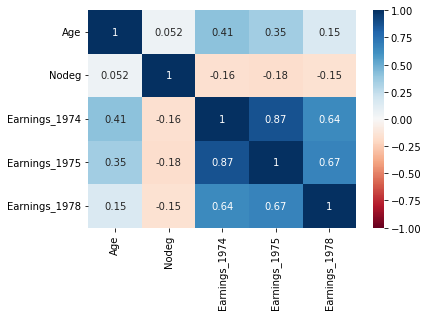

In [6]:
sns.heatmap(df.corr(), vmin=-1, vmax=1, cmap='RdBu', annot=True)

Observations: We can observe that Earnings_1974 and Earnings_1975 have a very high corelation, hence it would be advisable to remove one of them in the feature selection

In [7]:
df.describe(include='object')

,Eduacation,Race,Hisp,MaritalStatus
count,15992,15992,15992,15992
unique,5,2,2,2
top,HighSchool,NotBlack,NotHispanic,Married
freq,6252,14816,14840,11382


#### Let us first analyze the Age Column

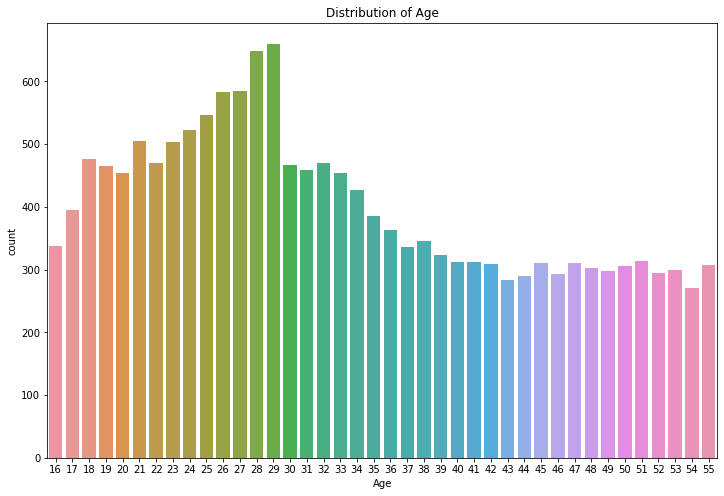

In [8]:
plt.figure(figsize=(12,8))
sns.countplot(x='Age', data=df)
plt.title('Distribution of Age')
plt.show()

Observations: We observe more number of labourers between age 18-31

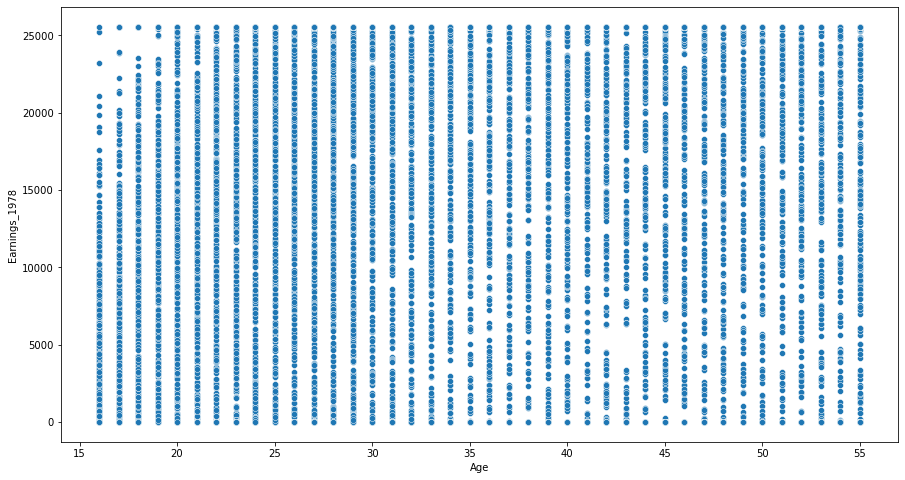

In [9]:
plt.figure(figsize=(15,8))
sns.scatterplot(x='Age', y='Earnings_1978', data=df)
plt.show()

Observation: There is no clear distribution of Age as compared to Earnings in 1978. Also, a correlation of 0.15 proves the same. Hence, age did not affet the earnings in 1978

#### Let us analyze the Education column

In [10]:
df.groupby('Eduacation')['Eduacation'].count().sort_values(ascending=False)

Eduacation
HighSchool            6252
LessThanHighSchool    4731
Intermediate          2708
graduate              1367
PostGraduate           934
Name: Eduacation, dtype: int64

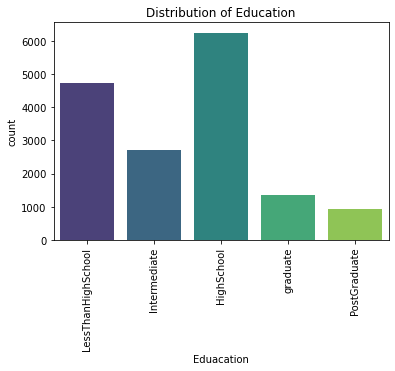

In [11]:
sns.countplot(x='Eduacation', data=df, palette='viridis')
plt.xticks(rotation='vertical')
plt.title('Distribution of Education')
plt.show()

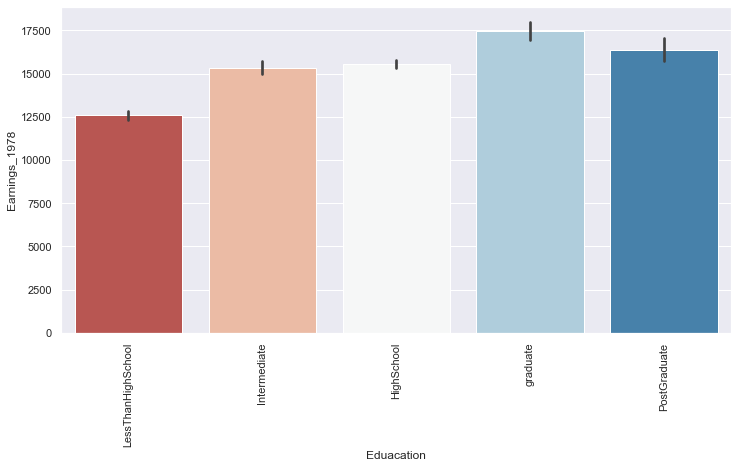

In [12]:
sns.set(rc={'figure.figsize':(12,6)})
sns.barplot(x='Eduacation', y='Earnings_1978', data=df, palette='RdBu')
# plt.legend(label='Inline label')
plt.xticks(rotation='vertical')
plt.show()

In [13]:
## Finding the median of Earnings in 1978 according to Education Level

df.groupby('Eduacation')['Earnings_1978'].describe()['50%'].sort_values(ascending=False)

Eduacation
graduate              22349.140
PostGraduate          21660.520
HighSchool            17840.595
Intermediate          17632.235
LessThanHighSchool    12412.900
Name: 50%, dtype: float64

Observations: Earnings in 1978 were directly related to the Education level. A higher education level resulted in a higher salary

#### Let's analyze the race column

In [14]:
pd.DataFrame({'Count':df.groupby('Race')['Race'].count()})

,Count
Race,
NotBlack,14816
black,1176


<AxesSubplot:xlabel='Race', ylabel='count'>

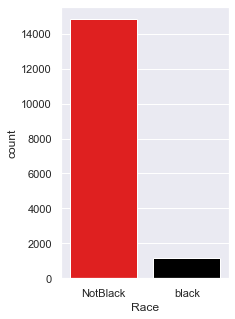

In [15]:
sns.set(rc={'figure.figsize':(3,5)})
sns.countplot(x='Race', data=df, palette={'NotBlack':'red','black':'black'})

In [16]:
## Finding the median of Earnings in 1978 according to Education Level

df.groupby('Race')['Earnings_1978'].describe()['50%'].sort_values(ascending=False)

Race
NotBlack    16894.11
black       12115.88
Name: 50%, dtype: float64

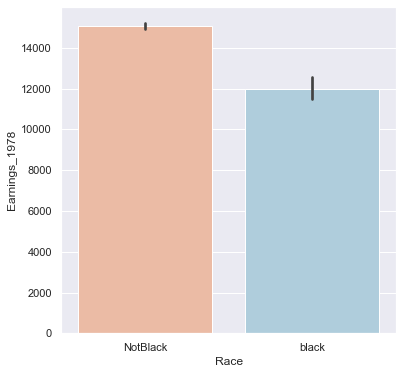

In [17]:
sns.set(rc={'figure.figsize':(6,6)})
sns.barplot(x='Race', y='Earnings_1978', data=df, palette='RdBu')
# plt.legend(label='Inline label')
# plt.xticks(rotation='vertical')
plt.show()

Observations:
1. There were more non-black people as compared to black people
2. The median salary of non-black people was more as compared to black people

#### Lets analyze the Hispanic Column

In [18]:
pd.DataFrame({'Count':df.groupby('Hisp')['Hisp'].count()})

,Count
Hisp,
NotHispanic,14840
hispanic,1152


Distribution of Hispanic/Non-Hispanic People


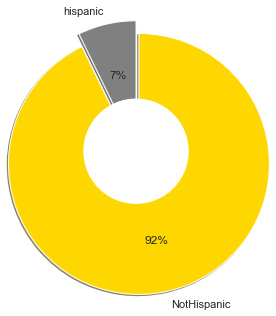

In [19]:
plt.figure(figsize=(3,3))
plt.pie(df.groupby('Hisp')['Hisp'].count(), labels=df['Hisp'].unique(), colors=['gold','grey'], radius=2, shadow=True, startangle=90,
       counterclock=False,explode=[.2,0], autopct='%d%%')
plt.pie([1], radius=.8, colors='w')
print('Distribution of Hispanic/Non-Hispanic People')
plt.show()

In [20]:
## Finding the median of Earnings in 1978 according to Hispanicity

df.groupby('Hisp')['Earnings_1978'].describe()['50%'].sort_values(ascending=False)

Hisp
NotHispanic    16717.52
hispanic       13717.74
Name: 50%, dtype: float64

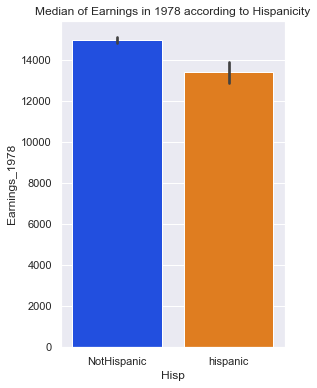

In [21]:
sns.set(rc={'figure.figsize':(4,6)})
sns.barplot(x='Hisp', y='Earnings_1978', data=df, palette='bright')
plt.title('Median of Earnings in 1978 according to Hispanicity')
# plt.legend(label='Inline label')
# plt.xticks(rotation='vertical')
plt.show()

Observations:
1. There were more non-hispanic people as compared to hispanic people
2. The median salary of non-hispanic people was more as compared to hispanic people

### Observation according to Race and Hispanicity
It is very clear that labourers were discriminated in terms of Earnings in 1978 based on their Race and Hispanicity

### Let us analyze the Earnings in 1974 and 1975

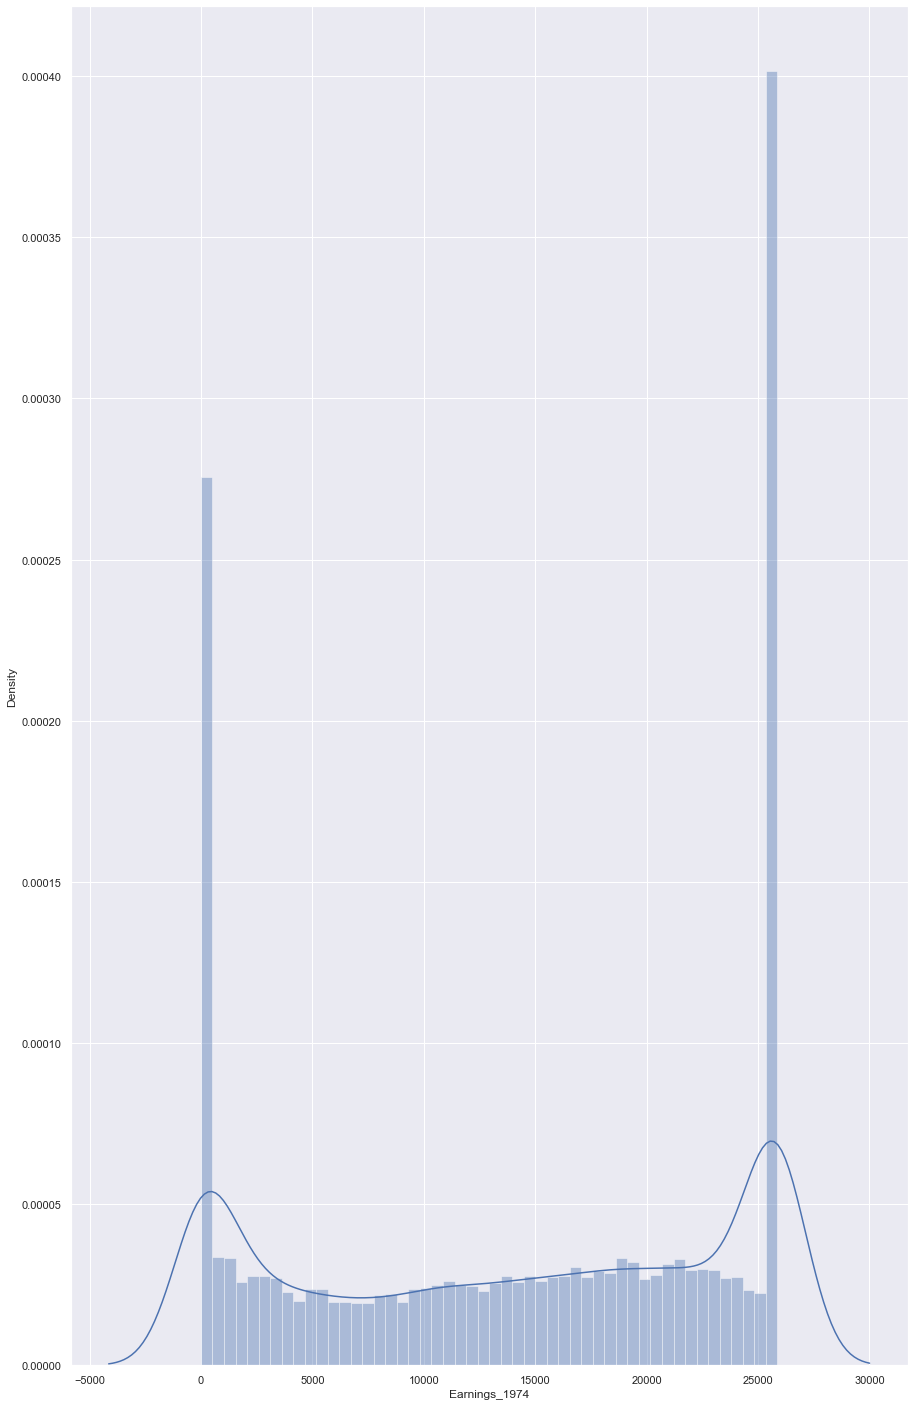

In [22]:
sns.set(rc={'figure.figsize':(15,25)})
sns.distplot(df['Earnings_1974'], bins=50)
plt.show()

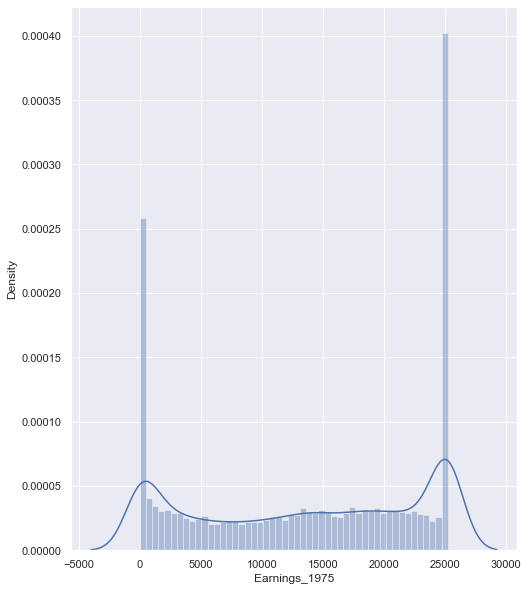

In [23]:
sns.set(rc={'figure.figsize':(8,10)})
sns.distplot(df['Earnings_1975'], bins=50)
plt.show()

#### We observe a high percentage of people with no jobs and the maximum earnings possible, both in 1974 and 1975
Let us find the exact number of people in 1974 with 0 and max earnings

In [24]:
df[df['Earnings_1974']==0].shape

(1913, 9)

In [25]:
df[df['Earnings_1974']==25862.32].shape

(3052, 9)

We find 1913 people with no job and 3052 with maximum earnings in 1974

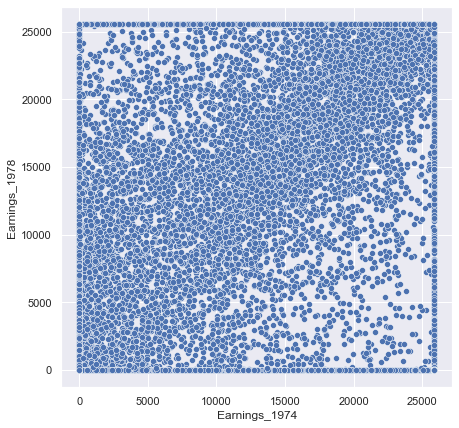

In [26]:
sns.set(rc={'figure.figsize':(7,7)})
sns.scatterplot(x='Earnings_1974', y='Earnings_1978', data=df)
plt.show()

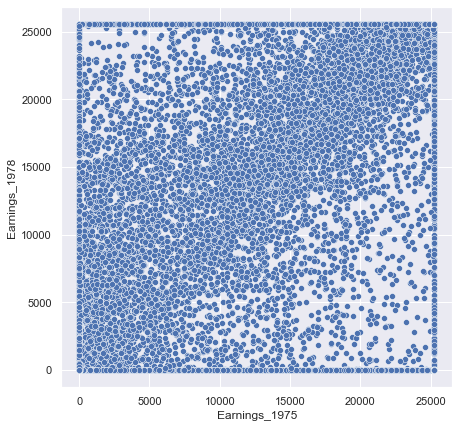

In [27]:
sns.set(rc={'figure.figsize':(7,7)})
sns.scatterplot(x='Earnings_1975', y='Earnings_1978', data=df)
plt.show()

Observations: We see a clear linear relation in earnings (both for 1974 and 1975) as compared to earnings in Earnings in 1978

## Outlier Treatment

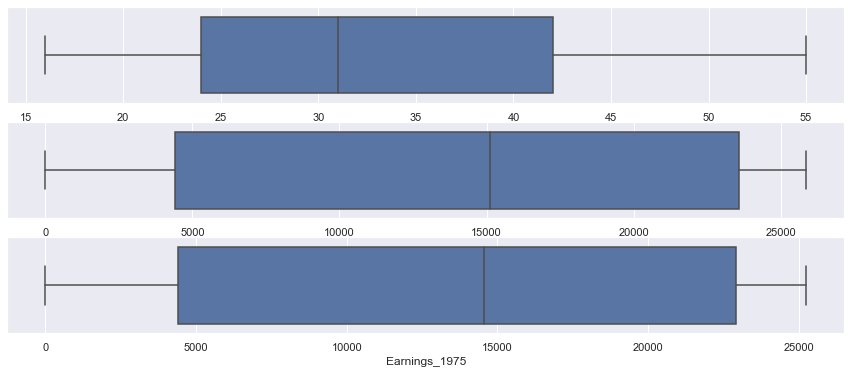

In [28]:
plt.figure(figsize=(15,6))
plt.subplot(3,1,1)
sns.boxplot(df['Age'])
plt.subplot(3,1,2)
sns.boxplot(df['Earnings_1974'])
plt.subplot(3,1,3)
sns.boxplot(df['Earnings_1975'])

plt.show()

Observations: Hence, there is no need for outlier treatment

## Feature Selection
As the column 'Nodeg' can be directly depicted though Education, we drop the 'Nodeg' column

We also drop Earnings_1974 as they have a multi-collinearity with Earnings_1975

In [29]:
df.drop(columns=['Nodeg'], axis=1, inplace=True)
df.head()

,Age,Eduacation,Race,Hisp,MaritalStatus,Earnings_1974,Earnings_1975,Earnings_1978
0,45,LessThanHighSchool,NotBlack,NotHispanic,Married,21516.670,25243.550,25564.670
1,21,Intermediate,NotBlack,NotHispanic,NotMarried,3175.971,5852.565,13496.080
2,38,HighSchool,NotBlack,NotHispanic,Married,23039.020,25130.760,25564.670
3,48,LessThanHighSchool,NotBlack,NotHispanic,Married,24994.370,25243.550,25564.670
4,18,LessThanHighSchool,NotBlack,NotHispanic,Married,1669.295,10727.610,9860.869


In [30]:
df['Earnings_74_75_Avg'] = (df['Earnings_1974'] + df['Earnings_1975'])/2
df.drop(columns=['Earnings_1974','Earnings_1975'], axis=1, inplace=True)
df.head()

,Age,Eduacation,Race,Hisp,MaritalStatus,Earnings_1978,Earnings_74_75_Avg
0,45,LessThanHighSchool,NotBlack,NotHispanic,Married,25564.670,23380.1100
1,21,Intermediate,NotBlack,NotHispanic,NotMarried,13496.080,4514.2680
2,38,HighSchool,NotBlack,NotHispanic,Married,25564.670,24084.8900
3,48,LessThanHighSchool,NotBlack,NotHispanic,Married,25564.670,25118.9600
4,18,LessThanHighSchool,NotBlack,NotHispanic,Married,9860.869,6198.4525


## Feature Engineering

In [31]:
df.dtypes

Age                     int64
Eduacation             object
Race                   object
Hisp                   object
MaritalStatus          object
Earnings_1978         float64
Earnings_74_75_Avg    float64
dtype: object

We have to convert categorical features Education, Race, Hisp, and Marital Status to numerical categories

In [32]:
df['Marriage'] = pd.get_dummies(df['MaritalStatus'], drop_first=True)
df['RacialStatus'] = pd.get_dummies(df['Race'], drop_first=True)
df['Hispanicity'] = pd.get_dummies(df['Hisp'], drop_first=True)
df.drop(columns=['MaritalStatus','Race','Hisp'], axis=1, inplace=True)
df.head()

,Age,Eduacation,Earnings_1978,Earnings_74_75_Avg,Marriage,RacialStatus,Hispanicity
0,45,LessThanHighSchool,25564.670,23380.1100,0,0,0
1,21,Intermediate,13496.080,4514.2680,1,0,0
2,38,HighSchool,25564.670,24084.8900,0,0,0
3,48,LessThanHighSchool,25564.670,25118.9600,0,0,0
4,18,LessThanHighSchool,9860.869,6198.4525,0,0,0


In [33]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

In [34]:
df['Eduacation'] = labelencoder.fit_transform(df['Eduacation'])
df.head()

,Age,Eduacation,Earnings_1978,Earnings_74_75_Avg,Marriage,RacialStatus,Hispanicity
0,45,2,25564.670,23380.1100,0,0,0
1,21,1,13496.080,4514.2680,1,0,0
2,38,0,25564.670,24084.8900,0,0,0
3,48,2,25564.670,25118.9600,0,0,0
4,18,2,9860.869,6198.4525,0,0,0


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15992 entries, 0 to 15991
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 15992 non-null  int64  
 1   Eduacation          15992 non-null  int32  
 2   Earnings_1978       15992 non-null  float64
 3   Earnings_74_75_Avg  15992 non-null  float64
 4   Marriage            15992 non-null  uint8  
 5   RacialStatus        15992 non-null  uint8  
 6   Hispanicity         15992 non-null  uint8  
dtypes: float64(2), int32(1), int64(1), uint8(3)
memory usage: 484.3 KB


## Train Test Split

In [36]:
x = df.drop(columns=['Earnings_1978'])
y = df['Earnings_1978']

In [37]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=1)

## Linear Regression

In [38]:
from sklearn.linear_model import LinearRegression

lr=LinearRegression()

In [39]:
lr.fit(x_train, y_train)

LinearRegression()

In [40]:
y_pred = lr.predict(x_test)

In [41]:
pd.DataFrame({'Actual':y_test, 'Predicted':y_pred}).head(20)

,Actual,Predicted
2996,0.00000,3535.946528
2981,3574.62100,5368.548753
11975,15517.61000,16527.071844
5891,9620.00000,20127.012699
9361,15227.97000,16707.982679
7779,17072.18000,14533.760908
5503,25564.67000,21577.485880
3227,25564.67000,24536.753820
15976,187.67130,3719.234654
8406,19381.86000,16765.830312


In [42]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score

In [43]:
print('R2 Score: ', r2_score(y_test, y_pred))
print('Mean Squared Error: ', mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error: ', (mean_squared_error(y_test, y_pred))**0.5)
print('Mean Absolute Percentage Error: ', mean_absolute_percentage_error(y_test, y_pred))

adjusted_r2 = 1-(1-r2_score(y_test,y_pred))*((x_train.shape[0]-1)/(x_train.shape[0]-x_train.shape[1]-1))

print('Adjusted R2: ', adjusted_r2)

R2 Score:  0.47618909740613524
Mean Squared Error:  49679049.39466139
Root Mean Squared Error:  7048.3366402762995
Mean Absolute Percentage Error:  5.827590098900614e+18
Adjusted R2:  0.4759432921960959
